In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [15]:
n=150
x,y = np.meshgrid(np.linspace(0,n,n),np.linspace(0,n,n))

u = (0.7-1*y**2)
v = (0.2+1*x**2)
vfield = (u,v)
skip = (slice(None, None, 55), slice(None, None, 55))


#fig, ax = plt.subplots(figsize=(5, 3))
#plt.quiver(x,y,u,v)
#plt.quiver(x[skip], y[skip], u[skip], v[skip], color='red',headwidth=3, scale=340,headlength=4)


<function matplotlib.pyplot.show(*args, **kw)>

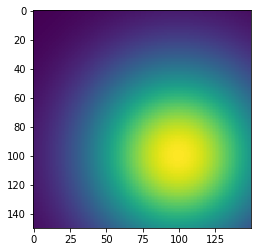

In [19]:
h0= 50*np.exp(-0.00025*(x-100)**2-0.00025*(y-100)**2)+ 50*np.exp(-0.00025*(x-300)**2-0.00025*(y-300)**2)#+np.random.randint(0,25,(n,n)) #depth profile
plt.imshow(h0)
plt.show

In [ ]:
from PIL import Image
image = Image.open('/content/heightmap (1).png')
image = np.array(image)
print(image[1].size)
from skimage.transform import resize
image_resized =resize(image, (n, n))
h = 50*(image_resized+0.000025*np.exp(-0.00025*(x-100)**2-0.00025*(y-100)**2) + 0.000025*np.exp(-0.00025*(x-300)**2-0.00025*(y-300)**2))
plt.imshow(h)

In [20]:
run=0
mineral_umbral=3000
tmax=100

times=[t for t in range(1,tmax)]
runs=[]
df=pd.DataFrame({'time':times})

print(df)

    time
0      1
1      2
2      3
3      4
4      5
..   ...
94    95
95    96
96    97
97    98
98    99

[99 rows x 1 columns]


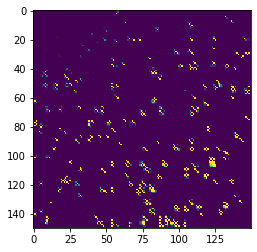

run #: 2 time: 1


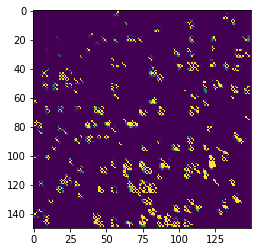

run #: 2 time: 2


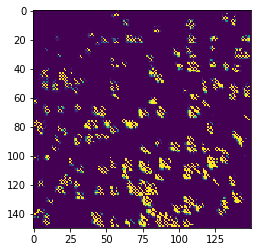

run #: 2 time: 3


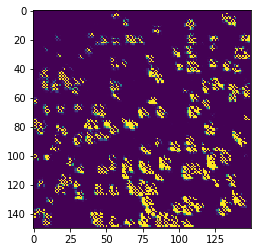

run #: 2 time: 4


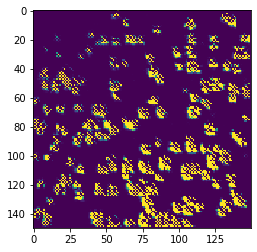

run #: 2 time: 5


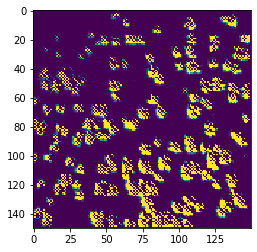

run #: 2 time: 6


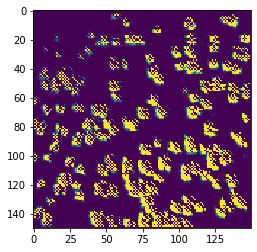

run #: 2 time: 7


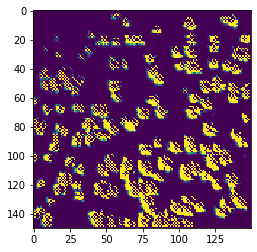

run #: 2 time: 8


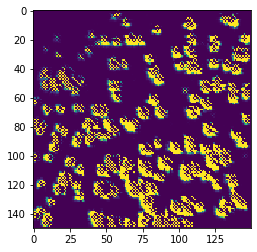

run #: 2 time: 9


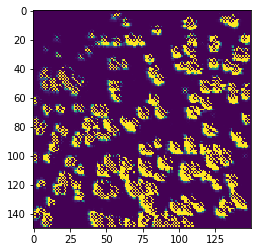

run #: 2 time: 10


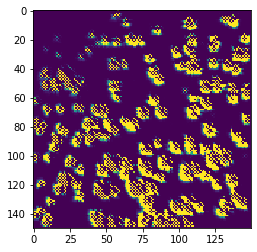

run #: 2 time: 11


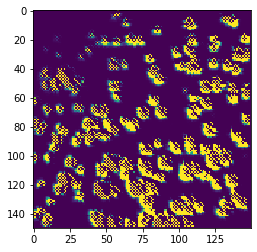

run #: 2 time: 12


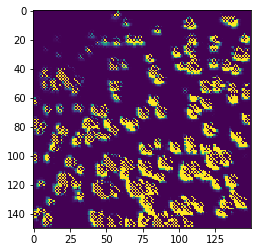

run #: 2 time: 13


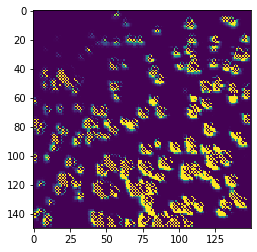

run #: 2 time: 14


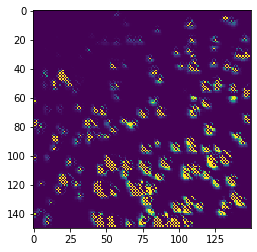

run #: 2 time: 15


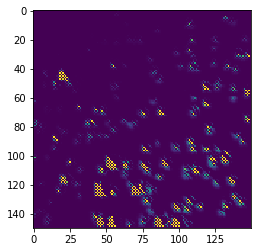

run #: 2 time: 16


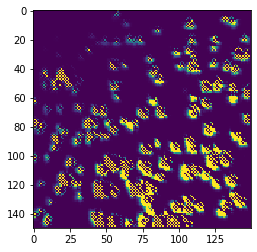

run #: 2 time: 17


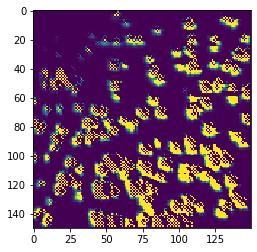

run #: 2 time: 18


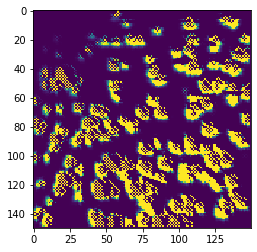

run #: 2 time: 19


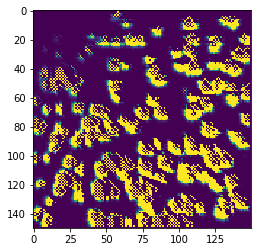

run #: 2 time: 20


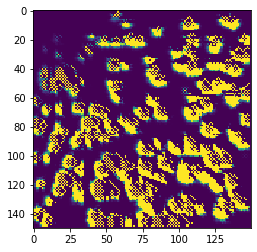

run #: 2 time: 21


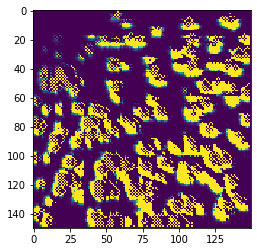

run #: 2 time: 22


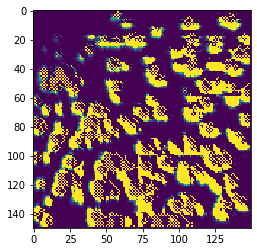

run #: 2 time: 23


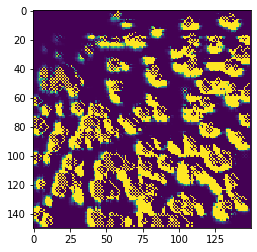

run #: 2 time: 24


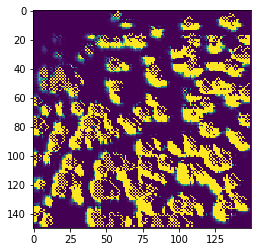

run #: 2 time: 25


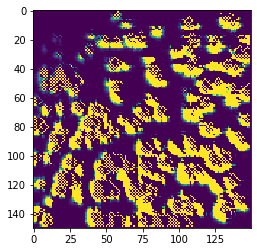

run #: 2 time: 26


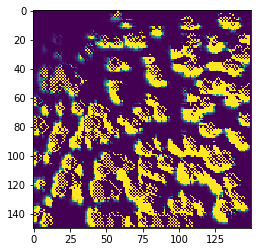

run #: 2 time: 27


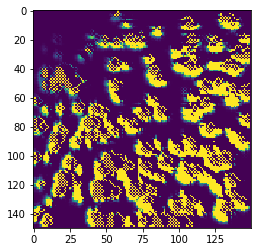

run #: 2 time: 28


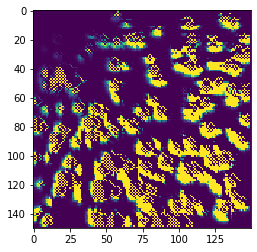

run #: 2 time: 29


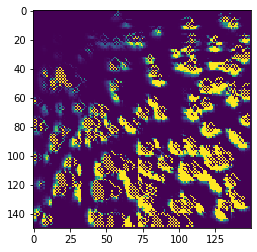

run #: 2 time: 30


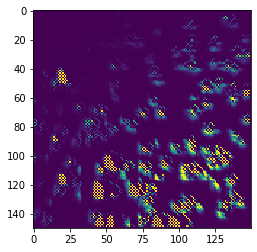

run #: 2 time: 31


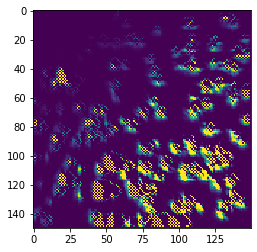

run #: 2 time: 32


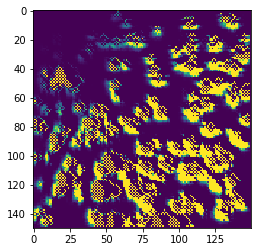

run #: 2 time: 33


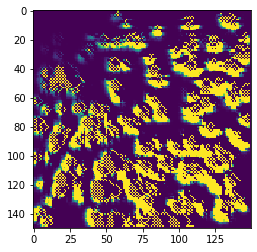

run #: 2 time: 34


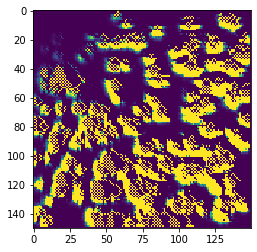

run #: 2 time: 35


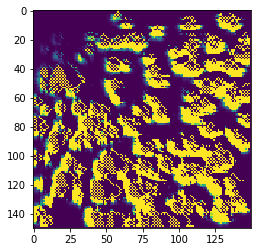

run #: 2 time: 36


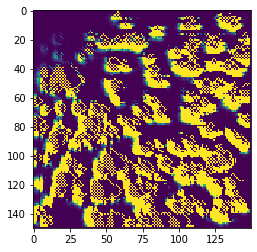

run #: 2 time: 37


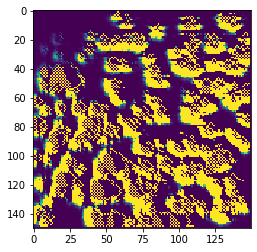

run #: 2 time: 38


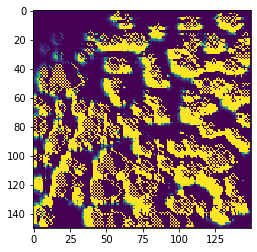

run #: 2 time: 39


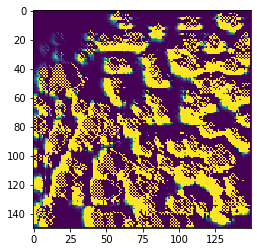

run #: 2 time: 40


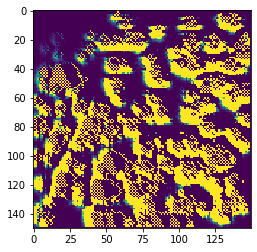

run #: 2 time: 41


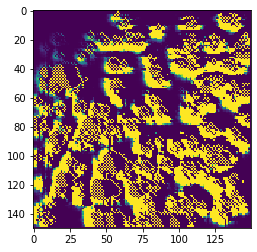

run #: 2 time: 42


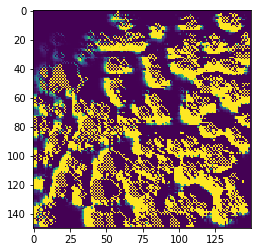

run #: 2 time: 43


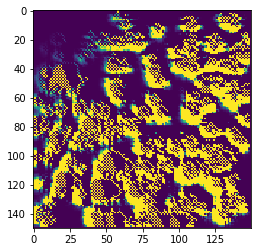

run #: 2 time: 44


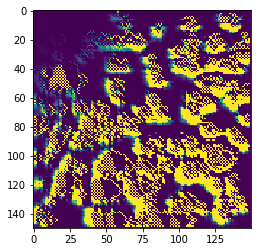

run #: 2 time: 45


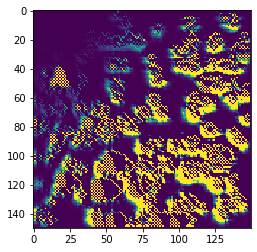

run #: 2 time: 46


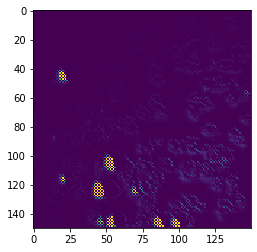

run #: 2 time: 47


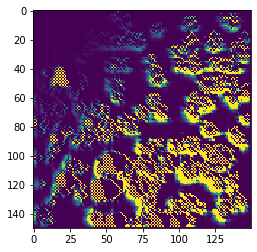

run #: 2 time: 48


In [ ]:
for k in range(0,1):
    z= 0+0*x
    run +=1
    r  = 1  #firs,second,... neighbour radious
    a=np.random.uniform(0, n-1, size=(230,2))
    for i,j in a:
        z[int(i),int(j)]=1

    d=10/n
    #phi_0 = np.random.randint(0,1,size=(n,n))

    
    Ca2_min=[]
    Ca2_mean=[]
    Ca2_max=[]
    population=[]
    


    for t in range(1,tmax):
        rx,ry = np.random.randint(1,n- r  ,n) ,np.random.randint(1,n- r  ,n)
        #u = 0.7-0.2*np.sin(t/5)*x
        #v = 0.2+0.2*np.sin(t/5)*y
        #vfield = (u,v)
        
        h=h0
        h=h0*(np.sin(t/5))**2
        for i in rx:
            for j in ry:

                if (z[i+ r  ,j+ r  ]>0 or z[i- r  ,j- r  ]> 0 or
                  z[i+ r  ,j- r  ]>0 or z[i- r  ,j+ r  ]> 0 or
                  z[i ,j- r  ]>0 or z[i ,j+ r  ]> 0 or
                  z[i+ r  ,j]>0 or z[i- r  ,j]> 0)  and (z[i ,j+ r  ]<0.5 and z[i + r ,j ]<0.5  and z[i ,j- r  ]<0.5 and z[i - r ,j ]<0.5 ):
                    '''
                    if (z[i+ r  ,j+ r  ]>0 or
                      z[i- r  ,j- r  ]> 0 or
                      z[i+ r  ,j- r  ]>0 or
                      z[i- r  ,j+ r  ]> 0):
                    '''
                    #EDO model
                    #z[i,j]= z[i,j]+ (0.025*(phi_0[i,j]+ phi_0[i-1,j-1] + phi_0[i-1,j] + phi_0[i-1,j+1]
                    #                                + phi_0[i+1,j]+phi_0[i,j+1] +phi_0[i+1,j+1]+phi_0[i,j-1]+phi_0[i+1,j-1]))
                    #Linear Agregation model
                    #z[i,j]= (z[i,j]+ 1)/np.mean(z)

                    #Random Linear Agregation model
                    #z[i,j]=( z[i,j]+ np.random.randint(0,10,1)/10  ) /np.mean(z)

                    #n-neighbour agregation
                    #z[i,j] = z[i+ r  ,j+ r  ]

                    #EDO model
                    z[i,j]= z[i,j] + (0.025*(z[i,j]+ z[i-1,j-1] + z[i-1,j] + z[i-1,j+1]
                                                    + z[i+1,j]+z[i,j+1] +z[i+1,j+1]+z[i,j-1]+z[i+1,j-1]))
                    z[i,j]= z[i,j]/np.mean(z)

                else:
                    z[i,j]=0



        nabla=np.gradient(z)
        dot_product=np.zeros((n,n))
        d=0
        for i in range(0,n-1):
            for j in range(0,n-1):
                d=nabla[1][j][i]*vfield[0][j][i]+ nabla[0][j][i]*vfield[1][j][i]
                dot_product[i,j]=d


        dot_product=(dot_product + z*0.05)*h #- 0.000015*np.matmul(vfield[0],vfield[0])#



        plt.imshow(dot_product,cmap='viridis',vmin=0,interpolation='nearest',vmax=500)#,origin='lower')
        #plt.imshow(z*h,cmap='viridis',vmin=0)
        #plt.savefig('time{}.jpg'.format(t), format='jpg')
        plt.show()
        print('run #:', run,'time:',t)
        
        Ca2_min.append(np.min(dot_product))
        Ca2_mean.append(np.mean(dot_product))
        Ca2_max.append(np.max(dot_product))

        #print(np.mean(dot_product))

        pp = np.array([x for x in dot_product.flatten() if x>=mineral_umbral])

        population.append(len(pp))

        #phi_0=z
        #h = h+dot_product
        
        
        
        
        
    df.insert(run,'population_run_{}'.format(run),population)
    df.insert(run+1,'ca2mean_run_{}'.format(run),Ca2_mean)    
            
    runs.append(run)
    

print('finished!')

# Plotting

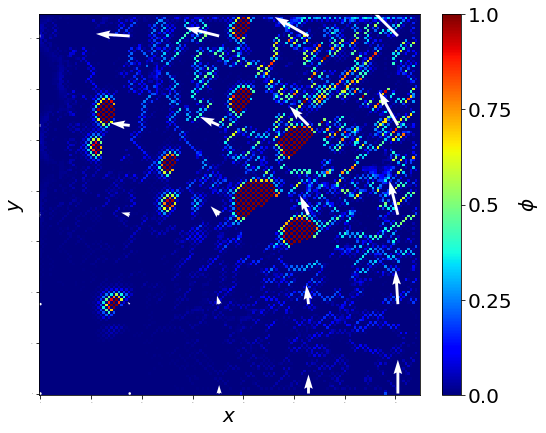

225000


In [7]:
plt.figure(1, figsize=[10, 7])
fntsize=20

im=plt.imshow(dot_product,cmap='jet',vmin=0,interpolation='nearest',vmax=75*mineral_umbral,origin='lower')

cb = plt.colorbar(im ,fraction=0.046, pad=0.04)

labels = np.linspace(0,1,5)
loc    = np.linspace(0,75*mineral_umbral,5)

cb.set_ticks(loc)
cb.set_ticklabels(labels)
cb.ax.tick_params(labelsize=20)
cb.set_label(label='$ \phi $',size=20)


skip = (slice(None, None, 35), slice(None, None, 35))
plt.quiver(x[skip], y[skip], u[skip], v[skip], color='white')#,headwidth=3, scale=3001,headlength=1)
plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)
#plt.savefig('EDO_mean_run{}.png'.format(run),format='png')

outname='FNA_solar_run{}'.format(run)
plt.savefig(outname+'.jpg', format='jpg')
plt.savefig(outname+'.pdf', format='pdf')

plt.show()
print(75*mineral_umbral)



---

⭕:
**Make several runs and scatterplot population or calcification as a cloud of points. do this for the different models used**

---



In [ ]:
#df=pd.DataFrame({'time':times})
#df.insert(run,'population_run_{}'.format(run),population)
#df.insert(run+1,'ca2mean_run_{}'.format(run),Ca2_mean)

In [7]:
#df=pd.read_csv('FNA_solar.csv')
print(df)

    time  population_run_1  population_run_2  population_run_3  \
0      1               288               407               327   
1      2               420               564               461   
2      3               568               739               625   
3      4               750               883               754   
4      5               919              1006               878   
..   ...               ...               ...               ...   
94    95              2637              2506              2513   
95    96              3867              3820              3706   
96    97              4441              4362              4252   
97    98              4822              4698              4619   
98    99              5001              4859              4786   

    population_run_4  population_run_5  population_run_6  population_run_7  \
0                412               297               285               309   
1                707               391             

In [10]:
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.cm as cm
nombre = ['population_run_{}'.format(x) for x in runs]
print(nombre)

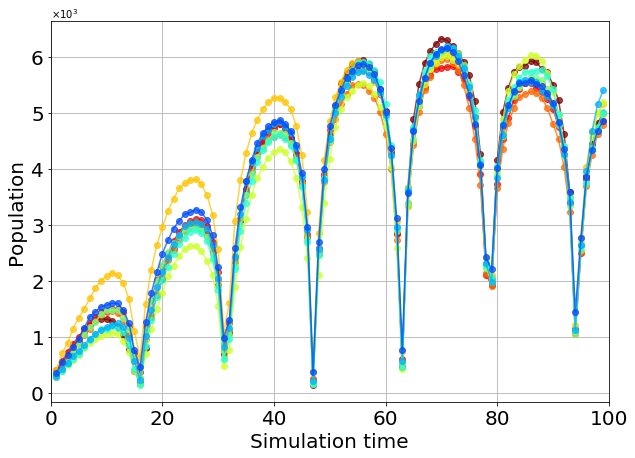

In [10]:
plt.figure(1, figsize=[10, 7])
r=11
nValues=np.arange(0,r,1)

normalize = mcolors.Normalize(vmin=nValues.min(), vmax=nValues.max())
#colormap = cm.Greys
#colormap = cm.viridis
#colormap = cm.gnuplot2
#colormap=cm.inferno
#colormap=cm.magma
colormap=cm.jet_r
dicc = {}

markers=['o','*','.','s','v','^','x','D']

for i,labl in enumerate(nombre):  #f[x,y] (x:filas, y:columnas)
    #print(i,labl)
    plt.plot(df['time'][::1],df[labl][::1], marker=markers[0],linestyle='-',
             label='run. {}'.format(labl) , color=colormap(normalize(i)),alpha=0.75)

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False


plt.xlim(0,100)
#plt.ylim(0,0.1e4)
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#plt.legend( title='Gs')
#plt.title('Ruido de disparo')
plt.ylabel('Population',fontsize=20)
#plt.ylabel('SNR',fontsize=25)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Simulation time',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ticklabel_format(axis="y", style="scientific", scilimits=(0,0),useMathText=True)
plt.grid()

outname='FNA_solar-Population_vs_time'
plt.savefig(outname+'.jpg', format='jpg')
plt.savefig(outname+'.pdf', format='pdf')


plt.show()

In [11]:
nombreca = ['ca2mean_run_{}'.format(x) for x in runs]

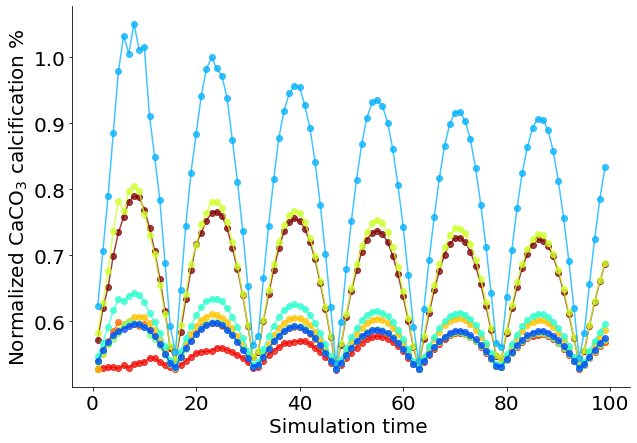

In [12]:
plt.figure(1, figsize=[10, 7])

r=11
nValues=np.arange(0,r,1)

normalize = mcolors.Normalize(vmin=nValues.min(), vmax=nValues.max())
#colormap = cm.Greys
#colormap = cm.viridis
#colormap = cm.gnuplot2
#colormap=cm.inferno
#colormap=cm.magma
#colormap=cm.jet_r
dicc = {}

markers=['o','*','.','s','v','^','x','D']
c10=np.max(df.max())
c0=np.min(df.min())

for i,labl in enumerate(nombreca):  #f[x,y] (x:filas, y:columnas)
    #print(i,labl)


    func = (abs(df[labl][::1]) -c0 )/(c10-c0)
    
    plt.plot(df['time'][::1],func, marker=markers[0],linestyle='-',
             label='run. {}'.format(labl) , color=colormap(normalize(i)),alpha=0.75)
    #print(np.max(abs(dd[labl][::4])))
#plt.rcParams['axes.spines.right'] = False
#plt.rcParams['axes.spines.top'] = False



#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#plt.legend( title='Gs')
#plt.title('Ruido de disparo')
plt.ylabel('Normalized CaCO$_3$ calcification %',fontsize=20)
#plt.ylabel('SNR',fontsize=25)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Simulation time ',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.ticklabel_format(axis="y", style="scientific", scilimits=(0,0),useMathText=True)


outname='FNA_solar-Mineralization_vs_time'
plt.savefig(outname+'.jpg', format='jpg')
plt.savefig(outname+'.pdf', format='pdf')


plt.show()

In [11]:
nombreca = ['ca2mean_run_{}'.format(x) for x in range(1,9)]

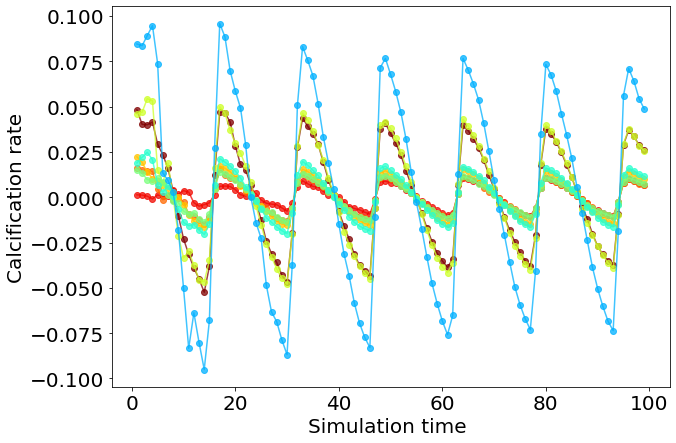

In [14]:
plt.figure(1, figsize=[10, 7])

r=11
nValues=np.arange(0,r,1)

normalize = mcolors.Normalize(vmin=nValues.min(), vmax=nValues.max())
#colormap = cm.Greys
#colormap = cm.viridis
#colormap = cm.gnuplot2
#colormap=cm.inferno
#colormap=cm.magma
colormap=cm.jet_r
dicc = {}

markers=['o','*','.','s','v','^','x','D']
c10=np.max(df.max())
c0=np.min(df.min())

for i,labl in enumerate(nombreca):  #f[x,y] (x:filas, y:columnas)
    #print(i,labl)


    func = (abs(df[labl][::1]) -c0 )/(c10-c0)
    rate = np.gradient(func)
    plt.plot(df['time'][::1],rate, marker=markers[0],linestyle='-',
             label='run. {}'.format(labl) , color=colormap(normalize(i)),alpha=0.75)
    #print(np.max(abs(dd[labl][::4])))
#plt.rcParams['axes.spines.right'] = False
#plt.rcParams['axes.spines.top'] = False



#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#plt.legend( title='Gs')
#plt.title('Ruido de disparo')
plt.ylabel('Calcification rate',fontsize=20)
#plt.ylabel('SNR',fontsize=25)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Simulation time ',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.ticklabel_format(axis="y", style="scientific", scilimits=(0,0),useMathText=True)


outname='FNA_solar-Mineralization_rate'
plt.savefig(outname+'.jpg', format='jpg')
plt.savefig(outname+'.pdf', format='pdf')


plt.show()

In [14]:
df.to_csv('FNA_solar.csv', sep=',', index=False, encoding='utf-8')

In [15]:
print('n:',n)
print('tmax:',tmax)
print('lambda_0:',0.025)
print('lambda_1:',0.000015)
print('h=h0*np.sin(t/5)')

n: 150
tmax: 100
lambda_0: 0.025
lambda_1: 1.5e-05
h=h0*np.sin(t/5)


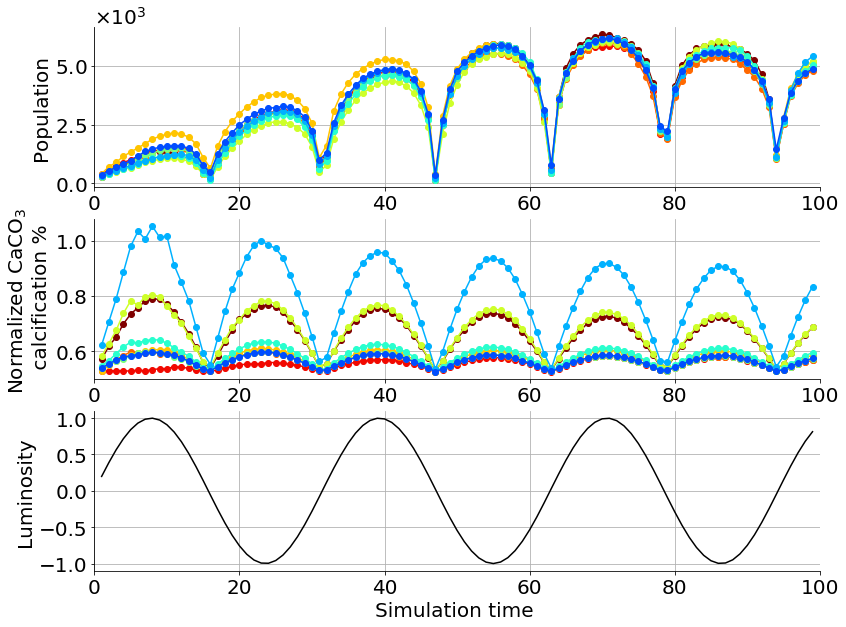

In [22]:
fig,ax= plt.subplots(3,1,figsize=[13, 10])
for i,labl in enumerate(nombreca):
    func = (abs(df[labl][::1]) -c0 )/(c10-c0)
    ax[1].plot(df['time'][::1],func, marker=markers[0],linestyle='-',
             label='run. {}'.format(labl) , color=colormap(normalize(i)),alpha=1)
    
for i,labl in enumerate(nombre): 

    ax[0].plot(df['time'][::1],df[labl][::1], marker=markers[0],linestyle='-',
             label='run. {}'.format(labl) , color=colormap(normalize(i)),alpha=1)
    

    

ax[0].set_ylabel('Population',fontsize=20)
ax[1].set_ylabel('Normalized CaCO$_3$ \n calcification %',fontsize=20)
ax[2].set_ylabel('Luminosity',fontsize=20)

ax[0].tick_params(labelsize=20)
ax[1].tick_params(labelsize=20)
ax[0].ticklabel_format(axis="y", style="scientific", scilimits=(0,0),useMathText=True)


ax[0].yaxis.get_offset_text().set_fontsize(20)
ax[1].yaxis.get_offset_text().set_fontsize(20)
ax[0].grid()
ax[1].grid()

ax[2].plot(df['time'][::1],np.sin(df['time'][::1]/5),color='black')
ax[2].grid()


plt.xlabel('Simulation time ',fontsize=20)
ax[0].set_xlim(0,100)
ax[1].set_xlim(0,100)
ax[2].set_xlim(0,100)
#ax[1].set_ylim(0,1.1)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.grid()


outname='FNA_solar_2graphs'
plt.savefig(outname+'.jpg', format='jpg')
plt.savefig(outname+'.pdf', format='pdf')
plt.show()
